In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
generation_df = pd.read_csv("data/Plant_2_Generation_Data.csv")

In [3]:
generation_df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,2020-06-17 23:45:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


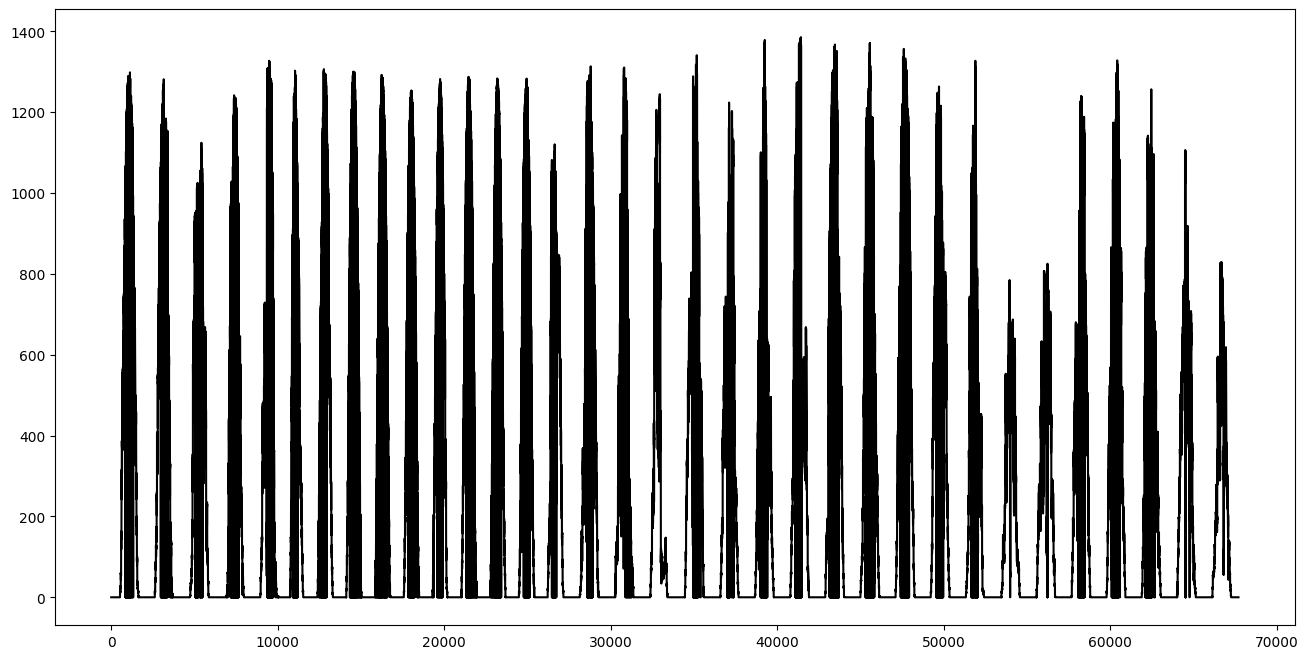

In [4]:
plt.figure(figsize=(16,8))
plt.plot(generation_df["AC_POWER"],color="black")

In [5]:
weather_df = pd.read_csv("data/Plant_2_Weather_Sensor_Data.csv")

In [6]:
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


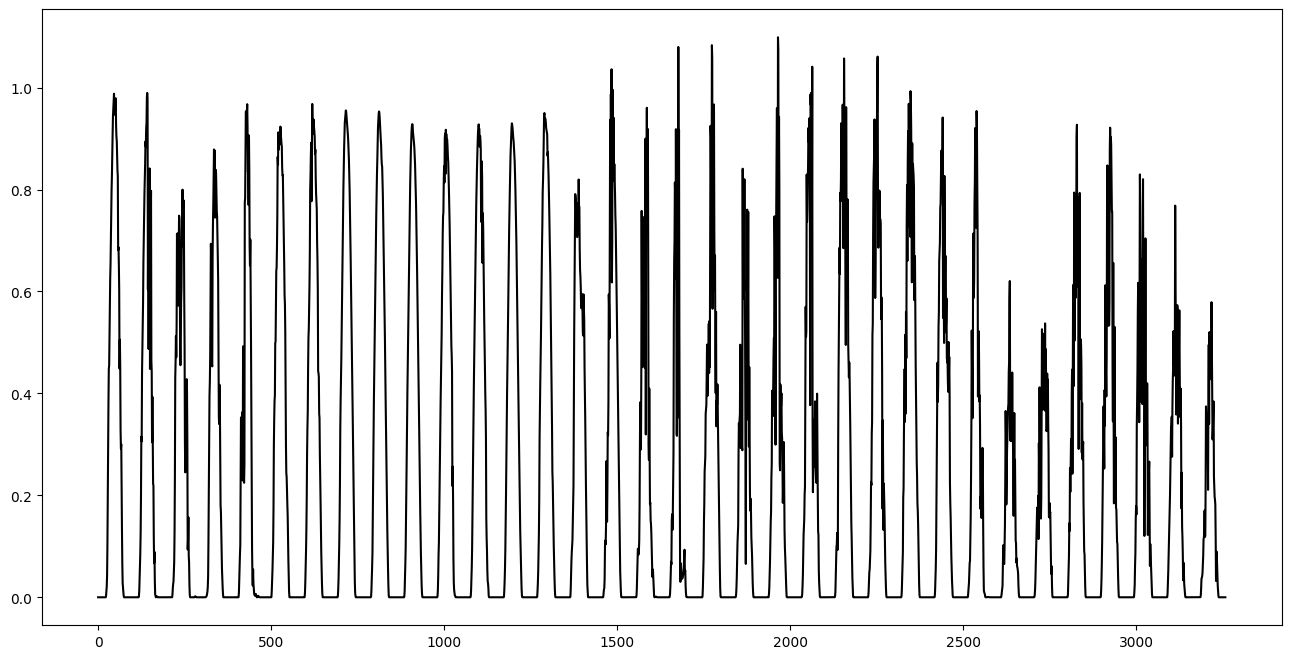

In [7]:
plt.figure(figsize=(16,8))
plt.plot(weather_df["IRRADIATION"],color="black")

In [8]:
 # Step 1: Group by timestamp and sum across inverters
generation_grouped = generation_df.groupby('DATE_TIME')[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].sum()

# Step 2: Reindex to match the weather timestamps exactly
# This keeps missing timestamps and fills them with zeros
generation_grouped = generation_grouped.reindex(weather_df['DATE_TIME']).fillna(0)

# Step 3: Reset index to make DATE_TIME a column again
generation_grouped = generation_grouped.reset_index().rename(columns={'index': 'DATE_TIME'})

In [9]:
weather_df_idx = weather_df.set_index('DATE_TIME')
generation_idx = generation_grouped.set_index('DATE_TIME')

display(weather_df_idx.describe())
display(generation_idx.describe())

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,3259.000000,3259.000000,3259.000000,3.259000e+03
mean,5124.648465,5011.974903,68443.535809,1.368802e+10
std,6462.118509,6317.872611,48505.077129,1.245968e+09
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,18698.245238,1.335913e+10
50%,494.427143,477.536667,73875.000000,1.419016e+10
75%,11048.773333,10795.727619,110975.223810,1.419312e+10
max,26630.506667,25979.760476,162876.000000,1.419408e+10


In [10]:
weather_df_idx = weather_df_idx.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
weather_df_idx.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,
2020-05-15 00:00:00,27.004764,25.060789,0.0
2020-05-15 00:15:00,26.880811,24.421869,0.0
2020-05-15 00:30:00,26.682055,24.427290,0.0
2020-05-15 00:45:00,26.500589,24.420678,0.0
2020-05-15 01:00:00,26.596148,25.088210,0.0


In [11]:
df = pd.merge(generation_idx, weather_df_idx, on='DATE_TIME')
df.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,
2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,27.004764,25.060789,0.0
2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,26.880811,24.421869,0.0
2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10,26.682055,24.427290,0.0
2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10,26.500589,24.420678,0.0
2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10,26.596148,25.088210,0.0


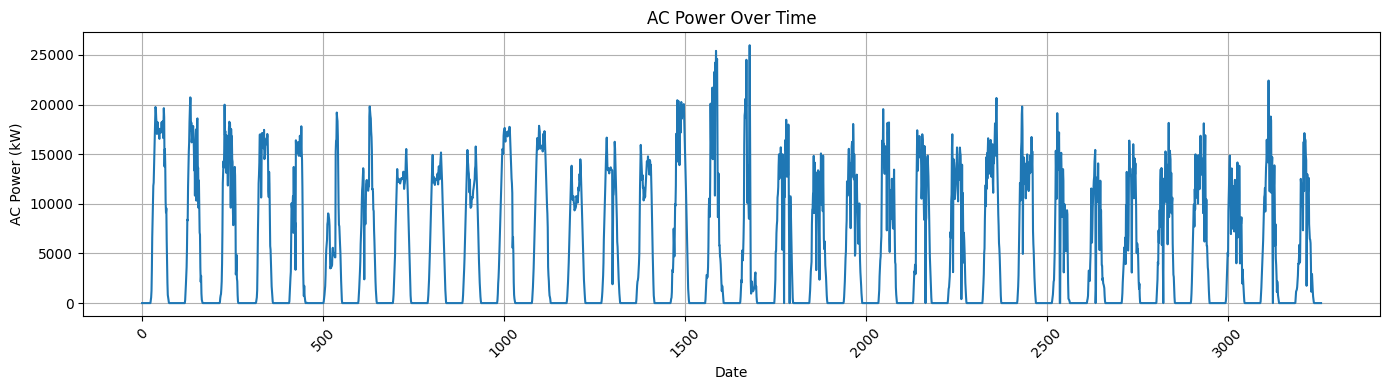

In [12]:
import numpy as np

plt.figure(figsize=(14, 4))
plt.plot(np.array(df['AC_POWER']))
plt.title('AC Power Over Time')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

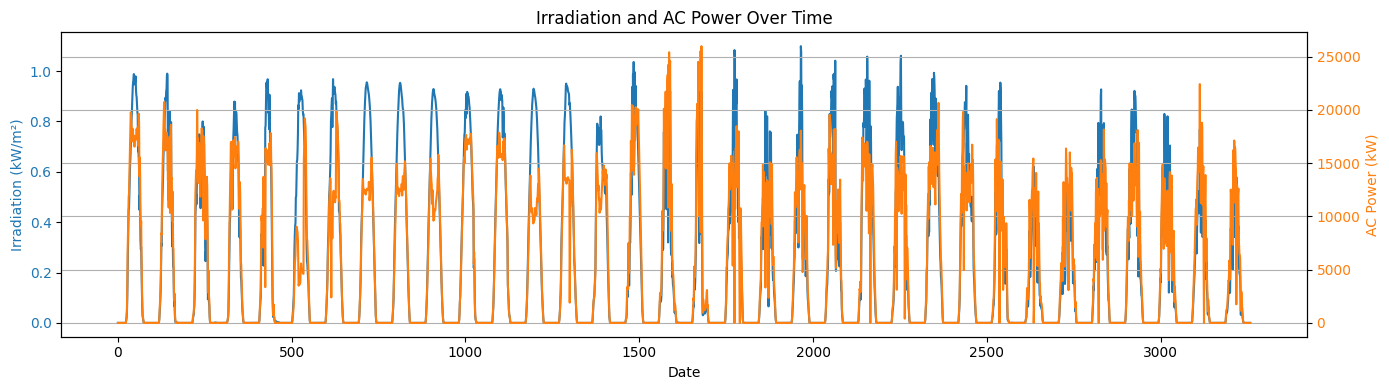

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 4))

ax1.plot(np.array(df['IRRADIATION']), color='tab:blue', label='Irradiation')
ax1.set_xlabel('Date')
ax1.set_ylabel('Irradiation (kW/m²)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(np.array(df['AC_POWER']), color='tab:orange', label='AC Power')
ax2.set_ylabel('AC Power (kW)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Irradiation and AC Power Over Time')
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)

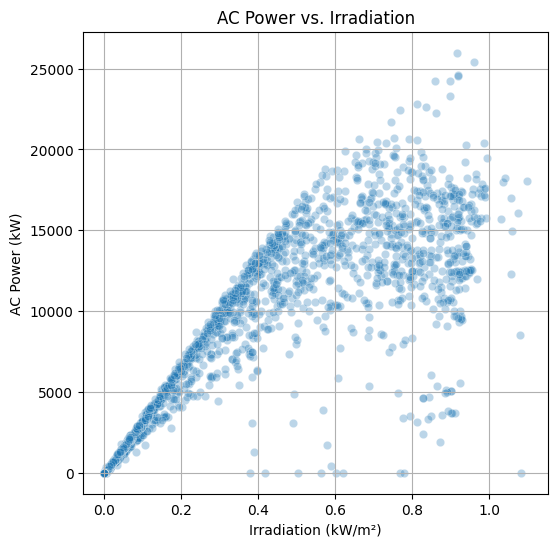

In [14]:
import seaborn as sns 

plt.figure(figsize=(6, 6))

sns.scatterplot(data=df, x='IRRADIATION', y='AC_POWER', alpha=0.3)

plt.title('AC Power vs. Irradiation')
plt.xlabel('Irradiation (kW/m²)')
plt.ylabel('AC Power (kW)')
plt.grid(True)
plt.show()

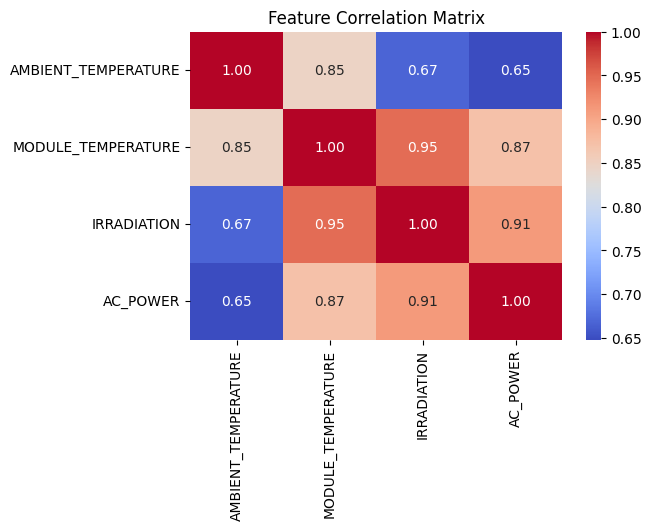

In [15]:
correlation_columns = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'AC_POWER']
corr_matrix = df[correlation_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [26]:
np.set_printoptions(precision=3, suppress=True, linewidth=120)
covariance_matrix = np.cov(df, rowvar=False)
print(covariance_matrix)

[[ 4.176e+07  4.083e+07 -3.431e+07  1.781e+11  1.702e+04  6.396e+04  1.842e+03]
 [ 4.083e+07  3.992e+07 -3.357e+07  1.759e+11  1.663e+04  6.249e+04  1.800e+03]
 [-3.431e+07 -3.357e+07  2.353e+09  1.130e+13  7.284e+04  2.055e+04 -2.268e+03]
 [ 1.781e+11  1.759e+11  1.130e+13  1.552e+18 -9.624e+08 -3.052e+09 -7.989e+07]
 [ 1.702e+04  1.663e+04  7.284e+04 -9.624e+08  1.650e+01  3.904e+01  8.479e-01]
 [ 6.396e+04  6.249e+04  2.055e+04 -3.052e+09  3.904e+01  1.287e+02  3.359e+00]
 [ 1.842e+03  1.800e+03 -2.268e+03 -7.989e+07  8.479e-01  3.359e+00  9.778e-02]]


In [29]:
cond_number = np.linalg.cond(covariance_matrix)
print(cond_number)

6.6204414835562e+20


In [33]:
np.linalg.det(covariance_matrix)

3.6051570645333213e+36